Data is from https://www.kaggle.com/datasnaek/youtube-new#CA_category_id.json

Our goal is to analyze the data to see what type of video a 'Lifestyle' YouTuber should make.

In [1]:
library(dplyr)
library(ggplot2)

setwd('/Users/taylorvillahermosa/Desktop/Trending-YouTube-Scraper-master/output')

# reading in the data
CA <- read.csv("18.01.11_CA_videos.csv")
DE <- read.csv("18.01.11_DE_videos.csv")
FR <- read.csv("18.01.11_FR_videos.csv")
GB <- read.csv("18.01.11_GB_videos.csv")
IN <- read.csv("18.01.11_IN_videos.csv")
JP <- read.csv("18.01.11_JP_videos.csv")
KR <- read.csv("18.01.11_KR_videos.csv")
MX <- read.csv("18.01.11_MX_videos.csv")
RU <- read.csv("18.01.11_RU_videos.csv")
US <- read.csv("18.01.11_US_videos.csv")

# adding Region classification column to the data
CA$Region <- "Canada"
DE$Region <- "Germany"
FR$Region <- "France"
GB$Region <- "Great Britain"
IN$Region <- "India"
JP$Region <- "Japan"
KR$Region <- "South Korea"
MX$Region <- "Mexico"
RU$Region <- "Russia"
US$Region <- "USA"

# combining worldwide data
all.data <- rbind(CA, DE, FR, GB, IN, JP, KR, MX, RU, US)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


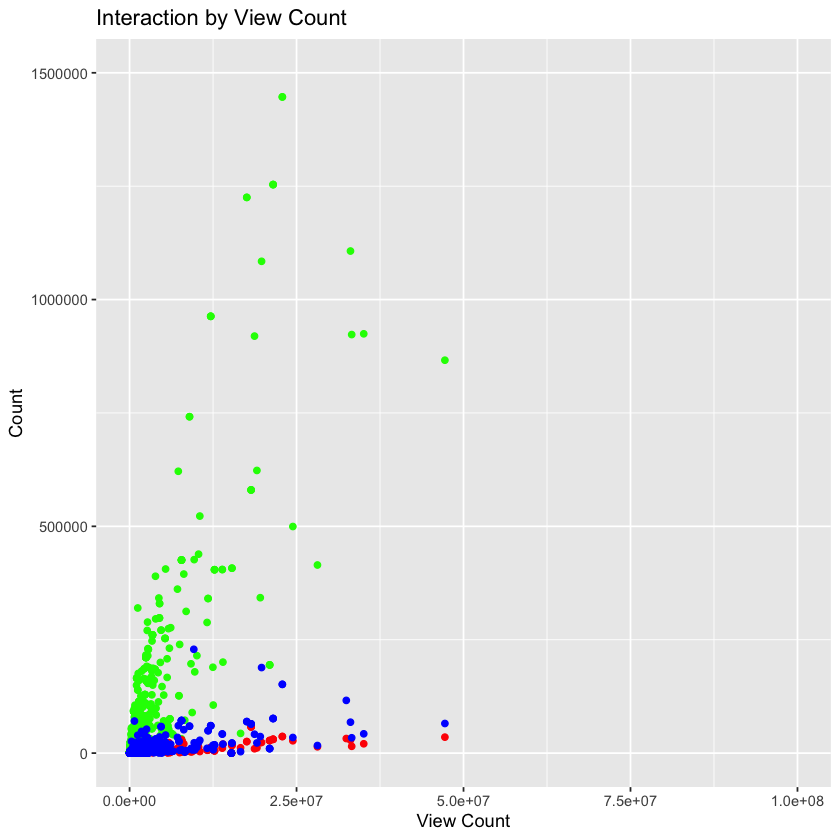

In [61]:
# plotting likes, dislikes, and comments by Views
# green = likes
# red = dislikes
# blue = comments

ggplot(all.data, aes(x = view_count)) + 
    geom_point(aes(y = likes), color = 'green') +
    geom_point(aes(y = dislikes), color = 'red') +
    geom_point(aes(y = comment_count), color = 'blue') +
    xlim(0,100000000) +
    ylim(0,1500000) + 
    xlab("View Count") + 
    ylab("Count")+
    ggtitle('Interaction by View Count')

From this plot, we can see that a high view count does not necessarily mean a popular video. For this analyses, we will assume that the YouTuber will want a high interaction rate regardless of positive/negative comments because any activity from viewers will create more viewership and profit for them.

In [62]:
# initializing data frame of all.tags so we can see view count, likes, dislikes, comment count, category, and region by tag
all.tags <- data.frame(tags = NA, 
                       view_count = NA, 
                       likes = NA,
                       dislikes = NA,
                       comment_count = NA,
                       category = NA,
                       region= NA,
                      videoid = NA)
all.tags <- head(all.tags, 0)

for (i in 1:nrow(all.data)){
    a <- data.frame(tags = unlist(strsplit(toString(all.data$tags[i]), split = '\\|')),
               view_count = all.data$view_count[i], 
               likes = all.data$likes[i],
               dislikes = all.data$dislikes[i], 
               comment_count = all.data$comment_count[i],
               category = all.data$categoryId[i],
               region = all.data$Region[i],
                   videoid = all.data$video_id[i])
    all.tags <- rbind(all.tags, a)
}

In [63]:
# finding average view count, likes, dislikes, and comments by tag
avg.rates <- all.tags %>% filter(tags != '[none]') %>%
    group_by(category, videoid) %>% 
    summarise(mean_views = mean(view_count), 
              mean_likes = mean(likes),
              mean_dislikes = mean(dislikes),
              mean_comments = mean(comment_count),
              n = n())

avg.rates

We will subset the data by a 'Lifestyle' category (categoryId 26). I created an 'interation' data point which is the sum of all views, likes, dislikes, and comments as a measure of popularity because the more viewers react to a video, the larger the interaction.

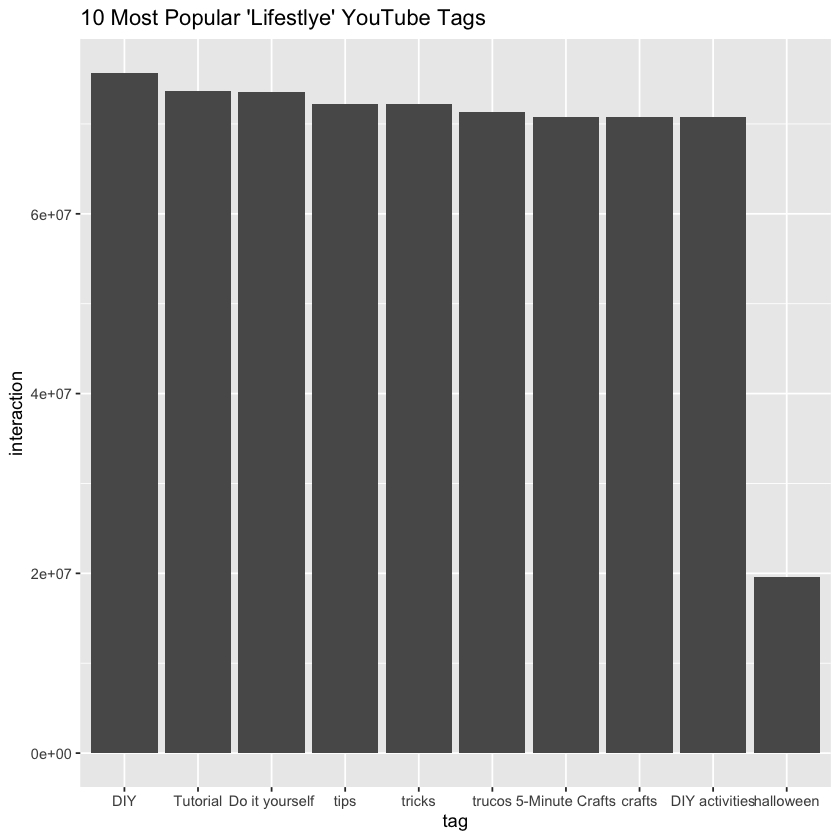

In [64]:
# focusing on lifestyle category
lifestyle <- all.tags %>% filter(category == 26)

# finding 10 most popular tags
top10lifestyle <- head(lifestyle %>% group_by(tags) %>% 
                       summarise(mean_views = mean(view_count), 
                                 mean_likes = mean(likes),
                                 mean_dislikes = mean(dislikes),
                                 mean_comments = mean(comment_count),
                                 n = n()) %>% 
                       arrange(desc(n)), 10)

# interaction will be defined as the sum of all views, likes, dislikes, and comments
top10lifestyle$interaction <- (top10lifestyle$n)*(top10lifestyle$mean_views+
                                                  top10lifestyle$mean_likes+
                                                  top10lifestyle$mean_dislikes+
                                                  top10lifestyle$mean_comments)

top10lifestyle

# plotting top 10 lifesyle tags' interaction 
ggplot(top10lifestyle, aes(x=reorder(tags, -interaction), y=interaction)) +
    geom_bar(stat='identity', position='dodge') + 
    ggtitle("10 Most Popular 'Lifestlye' YouTube Tags") + 
xlab('tag')

After analyzing each category, we can tell the YouTuber what the most popular tags are in their respective category for their preferred audience. We can group by different regions of the world, category, and most frequent tags in order to see which type of video will be the most popular for our specific YouTuber. In the future, I would like to find a way to categorize similar tags in order so we can analyze the data by a group of tags instead of predefined categories.